In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset= pd.read_csv('/content/Telcom Data.csv')

In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataset.shape

(7043, 21)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataset['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
dataset['Churn']= dataset['Churn'].replace({'Yes':1, 'No':0})

In [ ]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
for i in dataset.columns:
  print("*****************************************", i,
        "***************************************")
  print()
  print(set(dataset[i].tolist()))
  print()


***************************************** customerID ***************************************

{'9933-QRGTX', '2302-OUZXB', '2359-KLTEK', '9965-YOKZB', '4505-EXZHB', '6139-ZZRBQ', '3208-YPIOE', '1723-HKXJQ', '0665-XHDJU', '2346-LOCWC', '5522-JBWMO', '5537-UXXVS', '7654-YWJUF', '2230-XTUWL', '9987-LUTYD', '9298-WGMRW', '6777-TGHTM', '0943-ZQPXH', '0835-DUUIQ', '6859-QNXIQ', '1951-IEYXM', '4881-GQJTW', '3945-GFWQL', '9372-TXXPS', '2842-JTCCU', '9127-FHJBZ', '2333-KWEWW', '2908-ZTPNF', '4018-KJYUY', '3685-YLCMQ', '5701-YVSVF', '4825-XJGDM', '8217-QYOHV', '4361-BKAXE', '1599-MMYRQ', '2575-GFSOE', '1371-WEPDS', '5499-ECUTN', '7636-PEPNS', '6563-VRERX', '8707-HOEDG', '8399-YNDCH', '2360-RDGRO', '2167-FQSTQ', '3269-ATYWD', '1047-RNXZV', '5701-GUXDC', '8705-WZCYL', '9415-ZNBSX', '6856-RAURS', '0827-ITJPH', '8325-QRPZR', '3737-XBQDD', '9124-LHCJQ', '1415-YFWLT', '7205-BAIAD', '1907-YLNYW', '2265-CYWIV', '8008-HAWED', '6847-KJLTS', '0623-EJQEG', '9189-JWSHV', '4342-HENTK', '3724-BSCVH', '4672-FOT

In [ ]:
column_data_types = dataset.dtypes
print(column_data_types)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object


Lets visualize the dataset

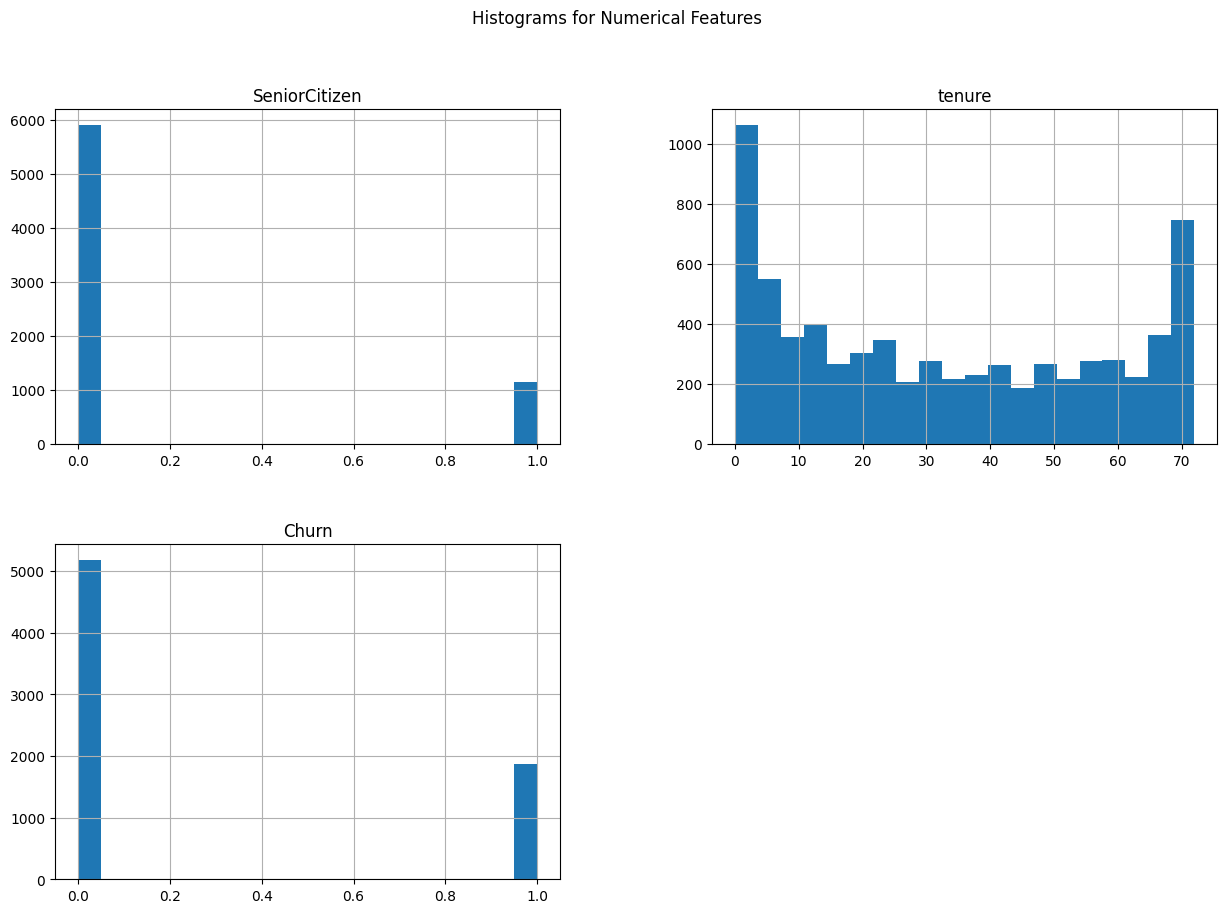

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for numerical features
numerical_features = dataset.select_dtypes(include=['int64'])
numerical_features.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms for Numerical Features")
plt.show()

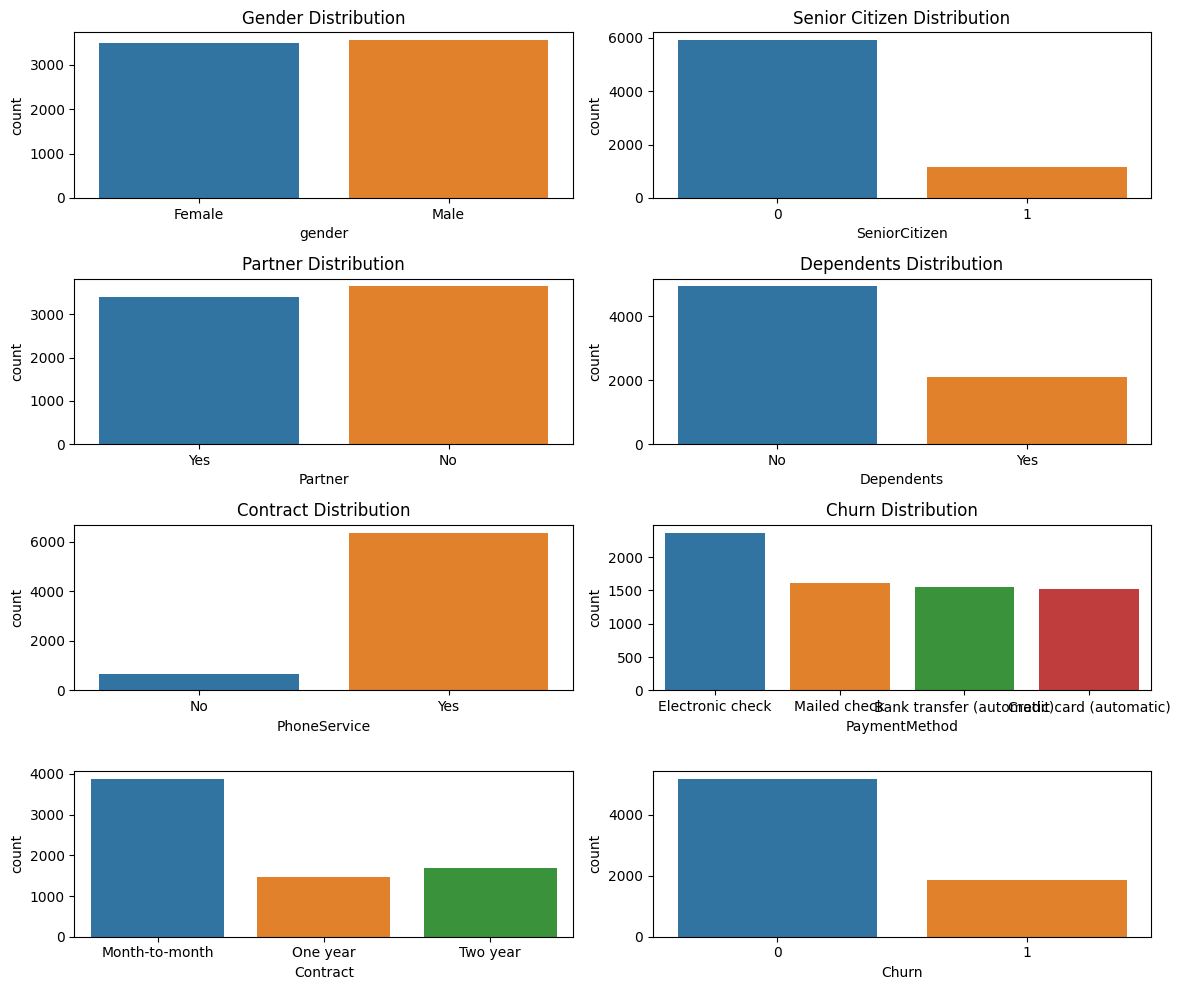

In [ ]:
# Create subplots for multiple visualizations
fig, axes = plt.subplots(4, 2, figsize=(12, 10))

# Plot 1: Gender distribution
sns.countplot(x='gender', data=dataset, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Plot 2: Senior Citizen distribution
sns.countplot(x='SeniorCitizen', data=dataset, ax=axes[0, 1])
axes[0, 1].set_title('Senior Citizen Distribution')

# Plot 3: Partner distribution
sns.countplot(x='Partner', data=dataset, ax=axes[1, 0])
axes[1, 0].set_title('Partner Distribution')

# Plot 4: Dependents distribution
sns.countplot(x='Dependents', data=dataset, ax=axes[1, 1])
axes[1, 1].set_title('Dependents Distribution')

# Plot 5: Tenure distribution
sns.countplot(data=dataset, x='PhoneService', ax=axes[2, 0])
axes[2, 0].set_title('PhoneService Distribution')

# Plot 6: PaymentMethod distribution
sns.countplot(x='PaymentMethod', data=dataset, ax=axes[2, 1])
axes[2, 1].set_title('PaymentMethod Distribution')

# Plot 7: Contract distribution
sns.countplot(data=dataset, x='Contract', ax=axes[3, 0])
axes[2, 0].set_title('Contract Distribution')

# Plot 8: Churn distribution
sns.countplot(x='Churn', data=dataset, ax=axes[3, 1])
axes[2, 1].set_title('Churn Distribution')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

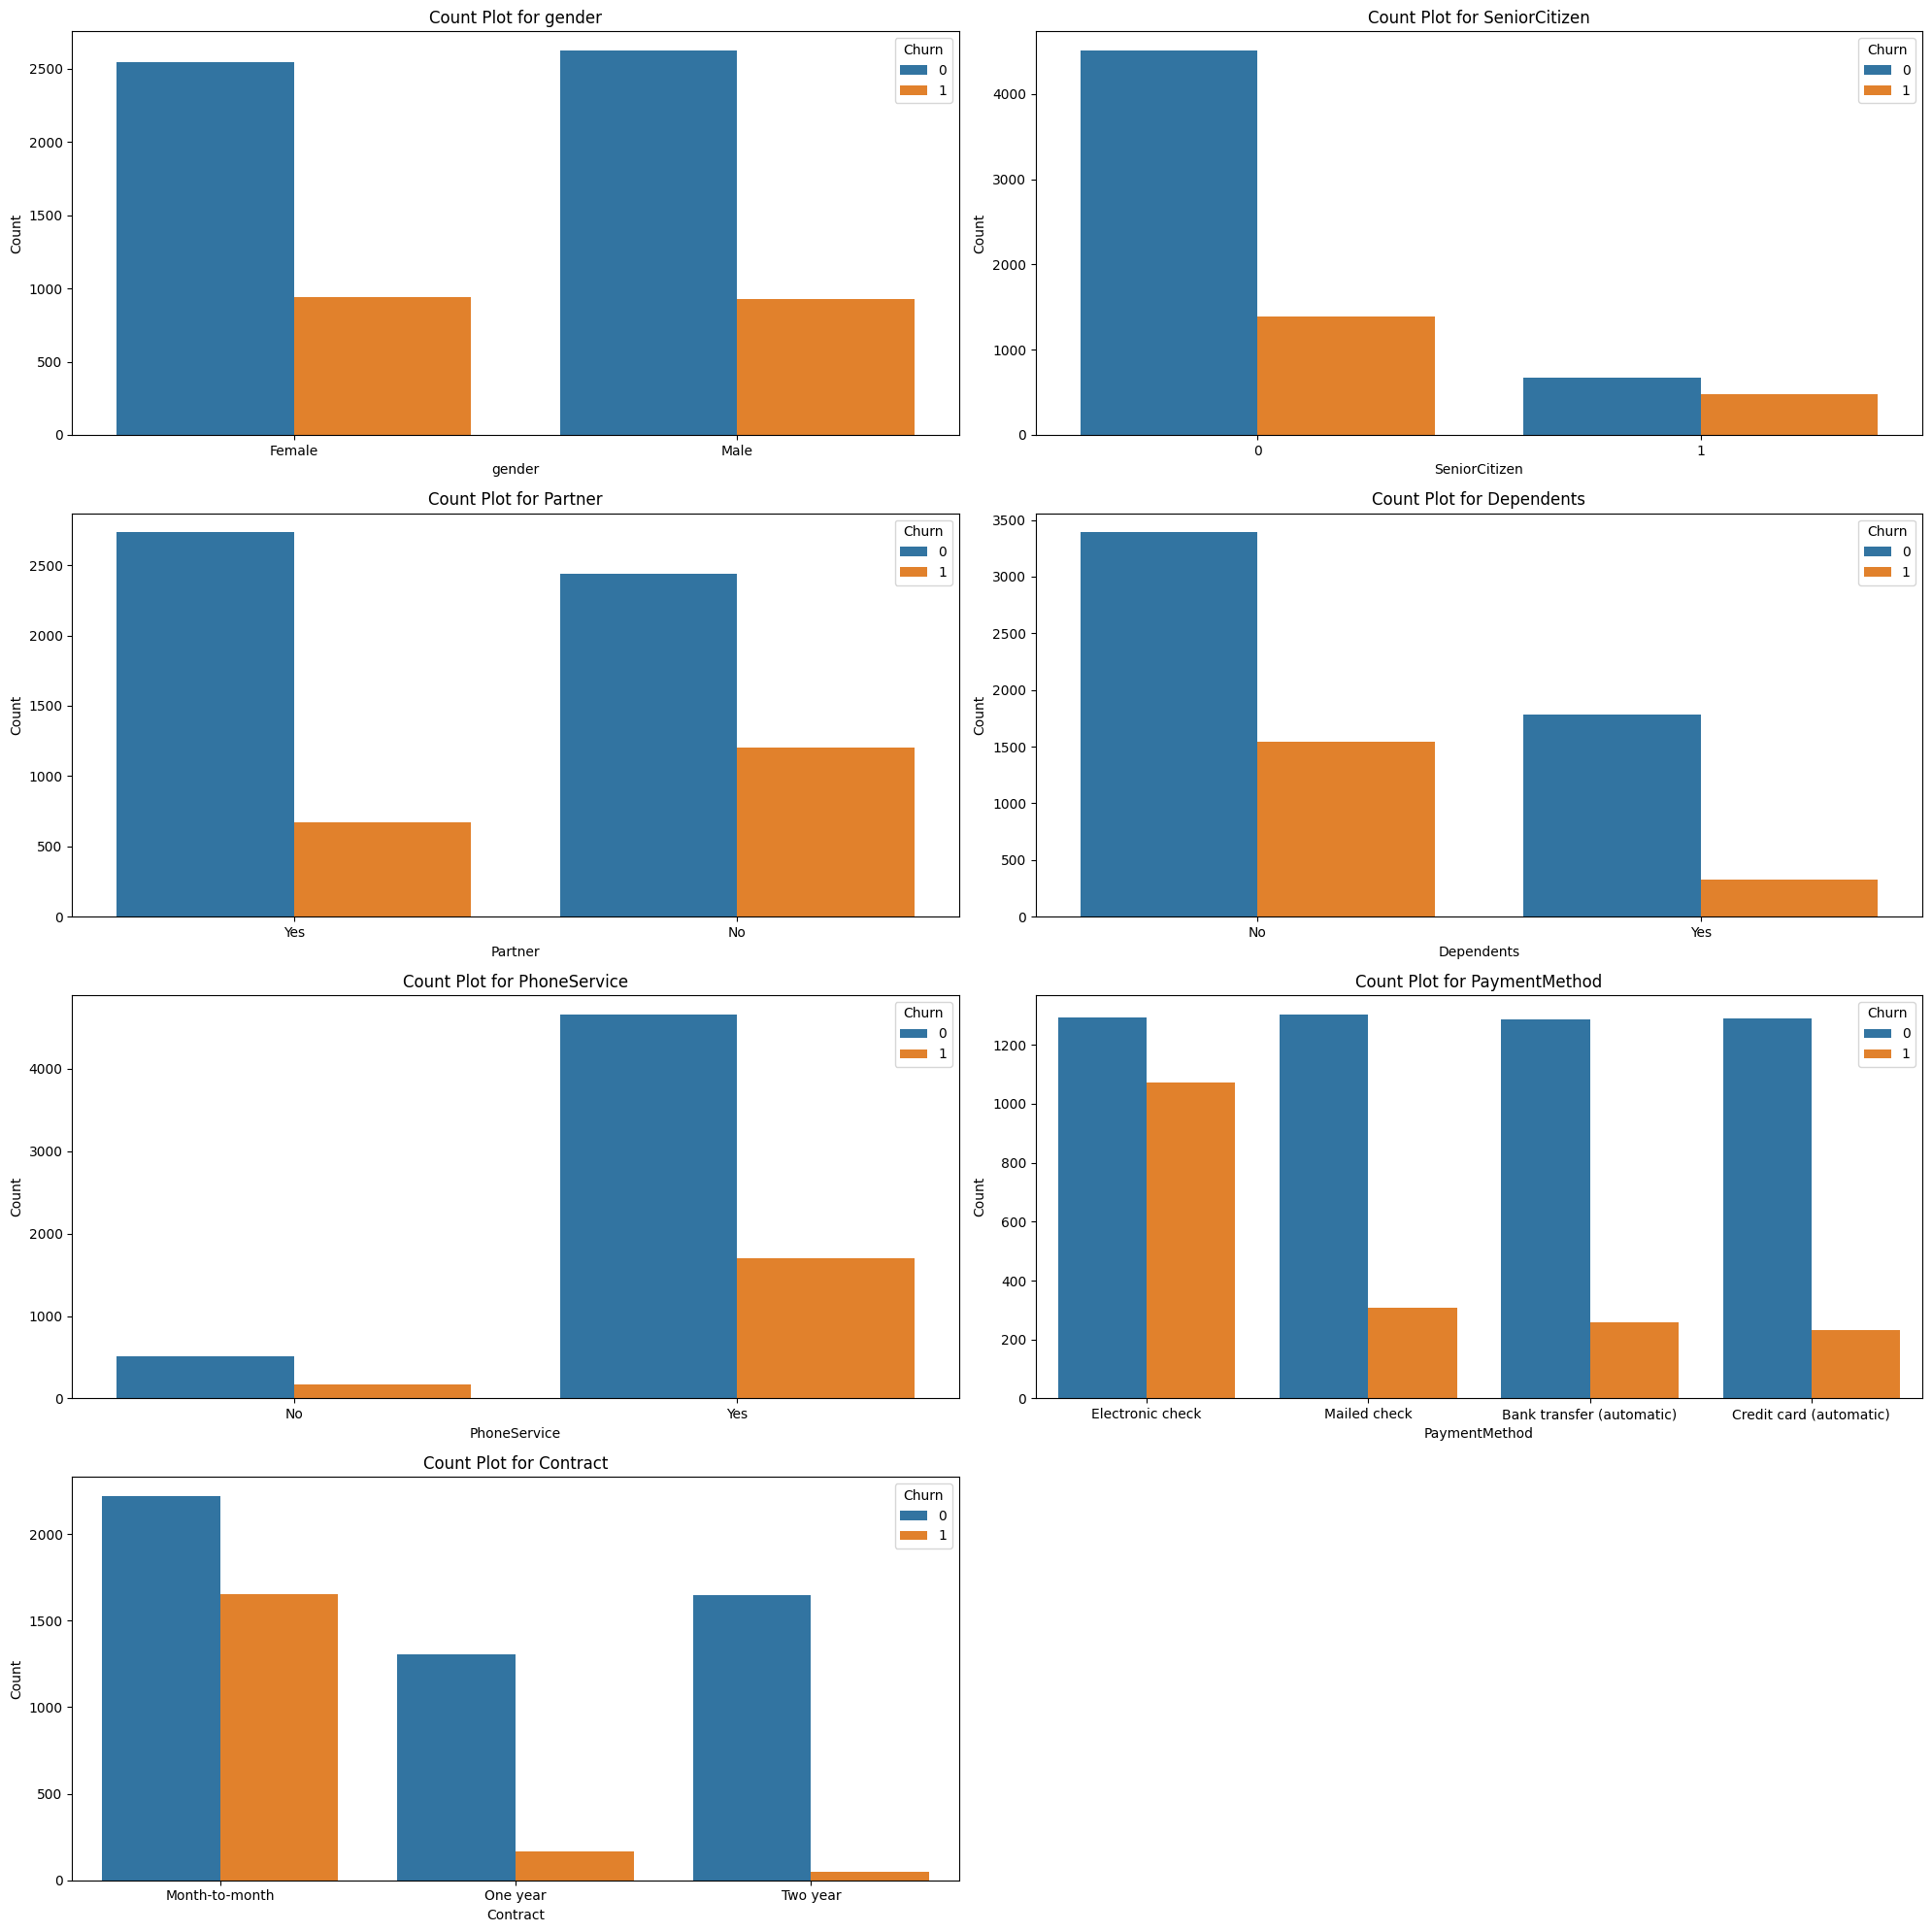

In [ ]:
countplot_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaymentMethod', 'Contract']

# Calculate the number of rows needed for subplots
num_rows = (len(countplot_columns) + 1) // 2  # Add 1 to round up if there's an odd number of columns

# Create subplots for count plots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 20))
plt.subplots_adjust(hspace=0.8)

# Loop through categorical columns and create count plots
for i, column in enumerate(countplot_columns):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    sns.countplot(data=dataset, x=column, hue='Churn', ax=ax)
    ax.set_title(f"Count Plot for {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.legend(title="Churn", loc='upper right')

# Remove any empty subplots if there are an odd number of columns
if len(countplot_columns) % 2 == 1:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()



In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.1 MB/s eta 0:

In [ ]:
from pycaret.classification import *

In [ ]:
exp_clf = setup(data=dataset, target= 'Churn', pca= True , pca_components=0.95 , session_id=123)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 21)"
4,Transformed data shape,"(7043, 3)"
5,Transformed train set shape,"(4930, 3)"
6,Transformed test set shape,"(2113, 3)"
7,Ordinal features,5
8,Numeric features,3
9,Categorical features,17


In [ ]:
#comparing models

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7913,0.8105,0.4060,0.6782,0.5066,0.3852,0.4061,0.7310
ridge,Ridge Classifier,0.7909,0.0000,0.3769,0.6962,0.4879,0.3712,0.3992,0.3660
ada,Ada Boost Classifier,0.7864,0.8031,0.3731,0.6780,0.4802,0.3601,0.3860,0.8180
lda,Linear Discriminant Analysis,0.7858,0.8081,0.4328,0.6451,0.5169,0.3863,0.3996,0.4480
lr,Logistic Regression,0.7844,0.8081,0.4450,0.6353,0.5222,0.3887,0.3996,1.2860
lightgbm,Light Gradient Boosting Machine,0.7822,0.8000,0.4350,0.6291,0.5136,0.3795,0.3906,0.5960
xgboost,Extreme Gradient Boosting,0.7704,0.7907,0.4389,0.5893,0.5015,0.3572,0.3644,0.8050
qda,Quadratic Discriminant Analysis,0.7686,0.8051,0.5130,0.5721,0.5398,0.3861,0.3878,0.3620
nb,Naive Bayes,0.7682,0.8036,0.5069,0.5719,0.5365,0.3829,0.3847,0.3750
knn,K Neighbors Classifier,0.7669,0.7580,0.4664,0.5771,0.5149,0.3640,0.3681,0.4030


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
train_data = dataset.sample(frac=0.8, random_state=101).reset_index(drop=True)
test_data = dataset.drop(train_data.index).reset_index(drop=True)

In [ ]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7972,0.8284,0.4462,0.6744,0.5370,0.4140,0.4285
1,0.7911,0.8083,0.4308,0.6588,0.5209,0.3947,0.4093
2,0.7647,0.7811,0.3130,0.6119,0.4141,0.2857,0.3108
3,0.8032,0.8148,0.4198,0.7237,0.5314,0.4178,0.4426
4,0.7870,0.8084,0.4351,0.6477,0.5205,0.3904,0.4031
5,0.7931,0.7868,0.4275,0.6747,0.5234,0.3996,0.4166
6,0.7951,0.8325,0.3740,0.7206,0.4925,0.3798,0.4119
7,0.8012,0.8012,0.4122,0.7200,0.5243,0.4101,0.4356
8,0.8032,0.8274,0.4656,0.6932,0.5571,0.4368,0.4511


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7972,0.8332,0.4154,0.6923,0.5192,0.4007,0.4217
1,0.7911,0.8012,0.4000,0.6753,0.5024,0.3810,0.4019
2,0.7708,0.7934,0.2977,0.6500,0.4084,0.2898,0.3238
3,0.7870,0.8179,0.3206,0.7241,0.4444,0.3362,0.3790
4,0.7850,0.8057,0.3511,0.6866,0.4646,0.3473,0.3778
5,0.7972,0.7941,0.3893,0.7183,0.5050,0.3912,0.4203
6,0.7972,0.8377,0.3511,0.7541,0.4792,0.3734,0.4155
7,0.8032,0.8092,0.3740,0.7656,0.5026,0.3975,0.4371
8,0.7870,0.8288,0.3817,0.6757,0.4878,0.3662,0.3900


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7832,0.8121,0.3476,0.6794,0.4599,0.3416,0.3716


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
2937,5312-IRCFR,Female,0,Yes,Yes,64,Yes,Yes,Fiber optic,No,...,No,Yes,One year,Yes,Electronic check,92.849998,5980.75,0,0,0.9048
3276,4210-QFJMF,Female,0,No,No,4,Yes,No,Fiber optic,No,...,No,Yes,Month-to-month,Yes,Electronic check,79.150002,317.25,1,1,0.6998
4374,2718-YSKCS,Male,0,Yes,Yes,71,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.600000,1387.45,0,0,0.9776
4375,9896-UYMIE,Male,0,No,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,One year,Yes,Bank transfer (automatic),114.300003,7383.7,0,0,0.9390
237,9903-LYSAB,Male,0,Yes,No,18,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,73.150002,1305.95,0,0,0.6802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,9489-JMTTN,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Two year,No,Credit card (automatic),89.750000,6595.9,0,0,0.9048
921,8942-DBMHZ,Male,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,20.450001,255.35,0,0,0.9074
5904,9402-CXWPL,Female,0,No,No,70,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,No,Electronic check,98.900002,6838.6,0,0,0.8913
3088,5751-USDBL,Male,0,Yes,Yes,46,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,81.000000,3846.35,0,0,0.7811


In [ ]:
unseen_prediction = predict_model(gbc , data = test_data)
unseen_prediction

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8020,0.8445,0.4199,0.7339,0.5342,0.4201,0.4465


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
0,2320-JRSDE,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.900000,19.9,1,0,0.5923
1,2087-QAREY,Female,0,Yes,No,22,Yes,No,DSL,No,...,No,No,Month-to-month,Yes,Mailed check,54.700001,1178.75,0,0,0.8096
2,0601-WZHJF,Male,0,Yes,No,14,No,No phone service,DSL,No,...,Yes,Yes,Month-to-month,No,Electronic check,46.349998,667.7,1,0,0.7387
3,4423-JWZJN,Male,0,Yes,Yes,64,Yes,Yes,Fiber optic,No,...,No,Yes,One year,No,Credit card (automatic),90.250000,5629.15,0,0,0.9407
4,5143-WMWOG,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Electronic check,19.950001,19.95,1,0,0.6575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.800003,1990.5,0,0,0.6241
1405,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.199997,7362.9,0,0,0.8876
1406,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,0,0,0.8415
1407,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.400002,306.6,1,1,0.5972


In [ ]:
unseen_prediction1 = predict_model(gbc , data = train_data)
unseen_prediction1

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8005,0.8460,0.4073,0.7254,0.5217,0.4080,0.4351


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
0,8659-IOOPU,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,No,Yes,Two year,No,Electronic check,100.449997,7159.7,0,0,0.8913
1,0887-HJGAR,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,Month-to-month,Yes,Mailed check,45.700001,45.7,1,1,0.5702
2,1029-QFBEN,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,19.549999,19.55,1,0,0.6972
3,7579-OOPEC,Female,1,Yes,No,2,Yes,No,DSL,No,...,No,No,Month-to-month,No,Credit card (automatic),50.150002,115.1,1,1,0.5598
4,8473-VUVJN,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,73.650002,73.65,1,1,0.6372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1428-GTBJJ,Male,0,No,No,11,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,74.550003,824.75,1,0,0.5680
5630,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.200001,20.2,0,1,0.5234
5631,3045-XETSH,Female,0,No,No,10,Yes,Yes,Fiber optic,No,...,No,Yes,Month-to-month,Yes,Electronic check,94.849998,953.45,1,1,0.7292
5632,2237-ZFSMY,Female,0,No,No,39,Yes,No,Fiber optic,Yes,...,Yes,No,One year,Yes,Electronic check,95.550003,3692.85,1,0,0.6720


In [ ]:
save_model(gbc , 'gbc_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(e...
                                             criterion='friedman_mse',